## Image Classification using Tensorflow

In this project, we will use tensorflow model to classify the handwritten number (dataset: mnist)

In [1]:
#importing dependencies

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# mnist dataset provided by tensorflow
from tensorflow.keras.datasets import mnist

## Spliting train and test datasets

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

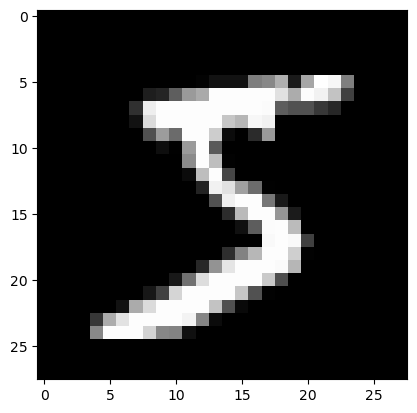

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [6]:
y_train[0]

5

## Normalizing train and test datasets

In [7]:
# X_train = tf.keras.utils.normalize(X_train, axis=1)
# X_test = tf.keras.utils.normalize(X_test, axis=1)

X_train, X_test = X_train/255.0, X_test/255.0
X_train.shape, X_test.shape


# you can do this step of normalization simply by dividing with 255.0 
# because they(numbers) size upto 255 px so if we divide them with 255.0 we Normalize pixel values to be between 0 and 1

((60000, 28, 28), (10000, 28, 28))

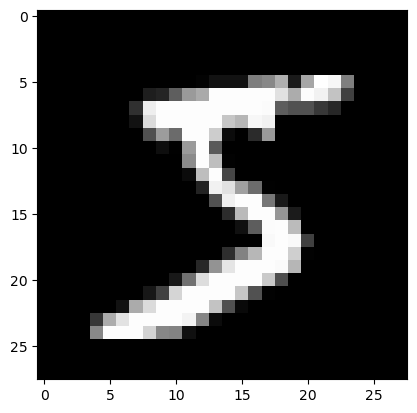

In [8]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

## Building model

In [9]:
model = models.Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10


1500/1500 [==============================] - 4s 2ms/step - loss: 0.2594 - accuracy: 0.9238 - val_loss: 0.1295 - val_accuracy: 0.9600
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9662 - val_loss: 0.1070 - val_accuracy: 0.9695
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0735 - accuracy: 0.9769 - val_loss: 0.0992 - val_accuracy: 0.9704
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0858 - val_accuracy: 0.9747
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0801 - val_accuracy: 0.9766
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0898 - val_accuracy: 0.9745
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0892 - val_accurac

## Plot Training history

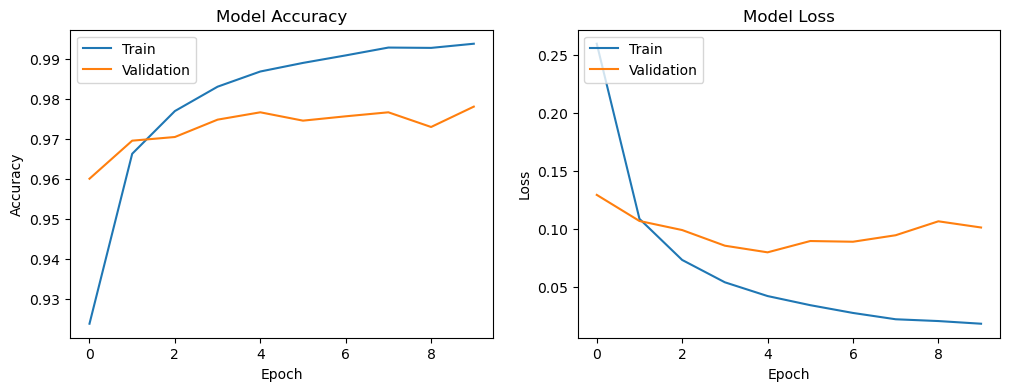

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.9763


In [14]:
test_acc, test_loss

(0.9763000011444092, 0.10299753397703171)

## Prediction

In [15]:
prediction = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [16]:
y_test[0]

7

In [17]:
np.argmax(prediction[0])

7

In [18]:
from sklearn.metrics import classification_report
y_pred = np.argmax(prediction, axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Yah! our model performing well with 98% accuaracy

and this is the conclusion of our project